In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from js import fetch
from io import StringIO

URL = "https://mrileysamc.github.io/jupyterlitestuff/files/dereksfolder/data.csv"

res = await fetch(URL)
text = await res.text()

tempfile = StringIO(text)
df = pd.read_csv(tempfile, index_col='year')


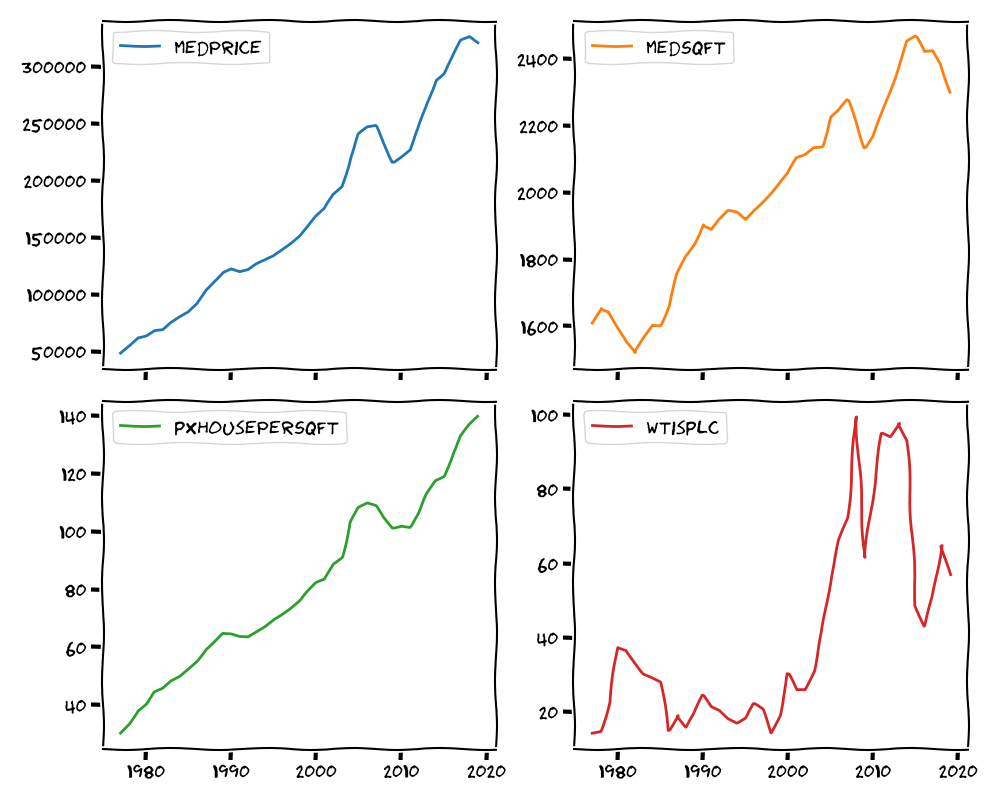

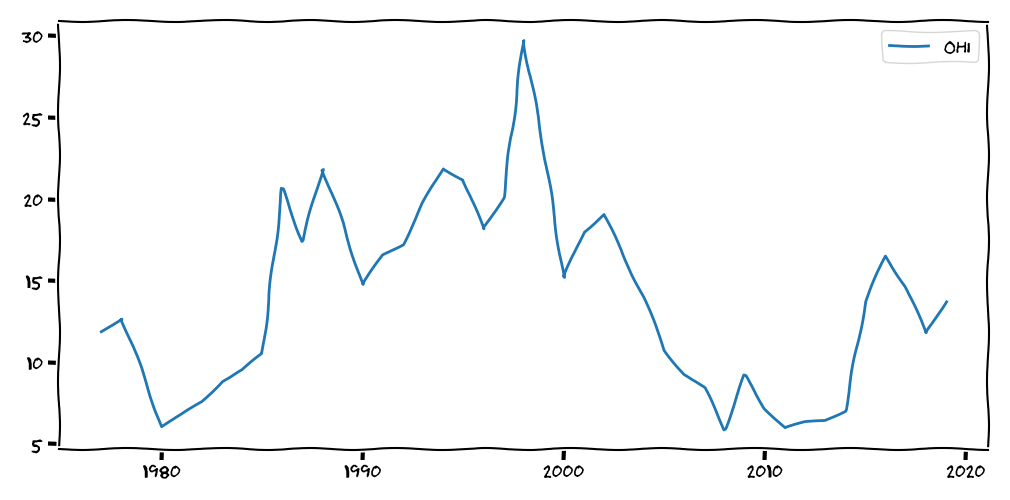

In [20]:
# House Price per square foot
df['pxHousePerSqFt'] = df.medPrice / df.medSqFt

# Gallons of Oil per Barrel
bVol = 42.0

# Need 7.48 gallons of oil to raise 1SqFt by 1Ft
galPerCuFt = 7.48 

# Cubic feet per barrel
cuFtPerBar = bVol / galPerCuFt

# Oil Price per cubic foot
df['pxOilPerCuFt'] = df.wtisplc / cuFtPerBar

# Oily House Index = House (sqFt) over Oil (cuFt)
df['OHI'] = df.pxHousePerSqFt / df.pxOilPerCuFt

# Forcing higher house price to match XKCD
#df['OHI'] = (df.pxHousePerSqFt * 1.2) / df.pxOilPerCuFt

# What about 80% LTV?

with plt.xkcd():
    axes = df.plot(y=['medPrice', 'medSqFt', 'pxHousePerSqFt', 'wtisplc'], subplots=True, layout=(2,2), figsize=(10,8))
    axes[1,0].set_xlabel('')
    axes[1,1].set_xlabel('')    
    plt.tight_layout()
    plt.savefig('graphs.png')      
    plt.show()

with plt.xkcd():    
    axes = df.plot(y=['OHI'], figsize=(10.1,5))
    axes.set_xlabel('')    
    plt.tight_layout()    
    plt.savefig('ohi.png')        
    plt.show()